In [1]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression()
lgr.fit(X_train, y_train)

c:\Users\jeanl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, lgr.predict(X_test))
print(cm)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [23]:
import numpy as np

np.unique(lgr.predict(X_test), return_counts=True)

(array(['setosa', 'versicolor', 'virginica'], dtype=object),
 array([10,  9, 11], dtype=int64))

In [9]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

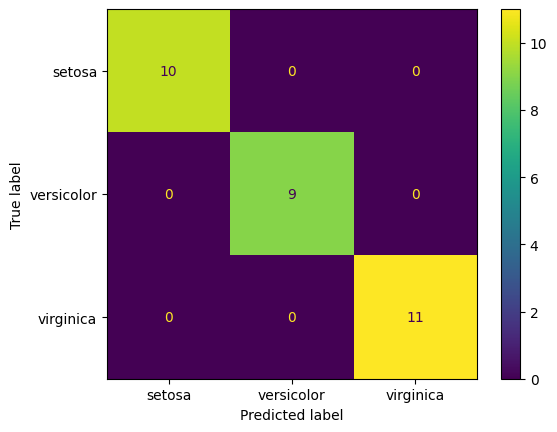

In [31]:
import matplotlib.pyplot as plt

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['setosa', 'versicolor', 'virginica'])
cm_display.plot()
plt.show()

In [28]:
from sklearn.metrics import accuracy_score

print(f'The Logistic Regression model accuracy was {(accuracy_score(y_test, lgr.predict(X_test)) * 100).round(2)}%')

The Logistic Regression model accuracy was 100.0%
